In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386848 entries, 0 to 386847
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      386848 non-null  object
 1   song_id      386848 non-null  object
 2   play_count   386848 non-null  int64 
 3   title        386848 non-null  object
 4   release      386848 non-null  object
 5   artist_name  386848 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.7+ MB


In [30]:
data

,user_id,song_id,play_count,title,release,artist_name
0,17aa9f6dbdf753831da8f38c71b66b64373de613,SOACPBY12A8C13FEF9,1,Full Circle,Breakout,Miley Cyrus
1,17aa9f6dbdf753831da8f38c71b66b64373de613,SOAKHOF12A8C13C72A,2,Poor Jackie,Rabbit Habits,Man Man
2,17aa9f6dbdf753831da8f38c71b66b64373de613,SOAVIJW12AB018269B,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry
3,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence,Distillation,Erin McKeown
4,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBGMYK12A6D4F6730,1,Everythings Just Wonderful,Alright_ Still,Lily Allen
...,...,...,...,...,...,...
386843,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOZKLCM12A8C13A69B,1,Oh Comely,In The Aeroplane Over The Sea,Neutral Milk Hotel
386844,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOZOIUU12A67ADFA39,1,He Can Only Hold Her,Back To Black,Amy Winehouse
386845,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOZPLKR12A6D4F8421,5,Drunk Kid Catholic,Noise Floor [Rarities 98 - 05],Bright Eyes
386846,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOZWQWL12A58A7EA09,3,Let's Live For Today,150 Rock 'N' Roll Classics,The Grass Roots


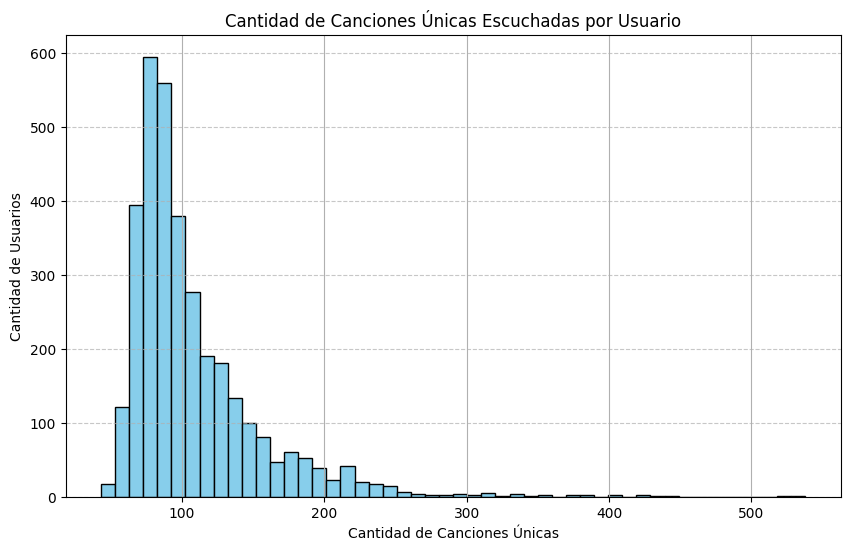

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcula el número de canciones únicas por usuario
canciones_por_usuario = data.groupby('user_id')['song_id'].nunique()

# Graficar el número de canciones únicas por usuario
plt.figure(figsize=(10, 6))
canciones_por_usuario.hist(bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de Canciones Únicas')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de Canciones Únicas Escuchadas por Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Filtrado colaborativo<BR>


In [10]:
usuarios = data['user_id'].unique()
canciones = data['song_id'].unique()

# Crear matriz de reproducciones inicializada con ceros
matriz_reproducciones1 = np.zeros((len(usuarios), len(canciones)))

# Mapear usuarios y canciones a índices
usuario_a_indice = {usuario: i for i, usuario in enumerate(usuarios)}
cancion_a_indice = {cancion: i for i, cancion in enumerate(canciones)}

# Llenar la matriz con los datos de reproducciones
for index, row in data.iterrows():
    usuario_idx = usuario_a_indice[row['user_id']]
    cancion_idx = cancion_a_indice[row['song_id']]
    play_count = row['play_count']
    matriz_reproducciones1[usuario_idx][cancion_idx] = play_count

# Mostrar la matriz de reproducciones
print(matriz_reproducciones1)

[[1. 2. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
similaridad_usuarios = cosine_similarity(matriz_reproducciones1)

# matriz de similitud entre usuarios
print(similaridad_usuarios)

[[1.00000000e+00 6.66800040e-04 3.46620971e-03 ... 4.82339771e-02
  1.43530030e-02 2.18659062e-01]
 [6.66800040e-04 1.00000000e+00 1.06087237e-03 ... 0.00000000e+00
  1.46429919e-03 7.31399550e-04]
 [3.46620971e-03 1.06087237e-03 1.00000000e+00 ... 0.00000000e+00
  1.14177439e-02 3.99211649e-02]
 ...
 [4.82339771e-02 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.34854741e-01 3.00458820e-02]
 [1.43530030e-02 1.46429919e-03 1.14177439e-02 ... 1.34854741e-01
  1.00000000e+00 6.55980009e-04]
 [2.18659062e-01 7.31399550e-04 3.99211649e-02 ... 3.00458820e-02
  6.55980009e-04 1.00000000e+00]]


# IMPORTANTE!
FILTRADO COLABORATIVO para la data filtrada:
Encontrar similitudes entre usuarios considerando todas las interacciones, incluso aquellas con un número bajo de reproducciones es casi imposible por el
minimo de reproduciones.

In [87]:
import numpy as np

usuario_ejemplo = 1
umbral_similitud = 0.7



usuarios_similares = np.where(similaridad_usuarios[usuario_ejemplo] > umbral_similitud)[0]

if len(usuarios_similares) > 0:
    canciones_usuario_ejemplo = set(np.where(matriz_reproducciones1[usuario_ejemplo] > 0)[0])
    canciones_recomendadas = set()

    for usuario_similar in usuarios_similares:
        if usuario_similar != usuario_ejemplo:
            canciones_usuario_similar = set(np.where(matriz_reproducciones1[usuario_similar] > 0)[0])
            canciones_recomendadas.update(canciones_usuario_similar - canciones_usuario_ejemplo)

    canciones_recomendadas = list(canciones_recomendadas)
    canciones_recomendadas.sort(key=lambda x: np.sum(matriz_reproducciones1[:, x]), reverse=True)

    if len(canciones_recomendadas) > 0:
        indice_a_cancion = {i: cancion for cancion, i in cancion_a_indice.items()}

        print("\nCanciones Recomendadas:")
        for cancion in canciones_recomendadas:
            print(f"Canción {indice_a_cancion[cancion]}: {np.sum(matriz_reproducciones1[:, cancion])} reproducciones")

    else:
        print("No hay suficientes datos para generar recomendaciones.")
else:
    print("No hay usuarios similares por encima del umbral de similitud.")


Canciones Recomendadas:
Canción SORKFPY12A8AE46AFB: 399.0 reproducciones
Canción SOMNXML12A6D4F8386: 393.0 reproducciones
Canción SOVOOSP12A6310F1AC: 322.0 reproducciones
Canción SOMOZKO12AB017C323: 246.0 reproducciones
Canción SODORHA12A6701E746: 246.0 reproducciones
Canción SOPHQPE12AB0183798: 246.0 reproducciones
Canción SOJLJQK12A6D4FC6E9: 239.0 reproducciones
Canción SOFUPGI12AB017C32D: 210.0 reproducciones
Canción SONANKR12A8AE48518: 210.0 reproducciones
Canción SOJQOIK12AF72A0AAF: 191.0 reproducciones
Canción SOHTLBP12A8C1360DD: 177.0 reproducciones
Canción SOVPBLT12A6D4F5113: 175.0 reproducciones
Canción SOXMGFH12A6701FF31: 168.0 reproducciones
Canción SOTFIZR12A8151CD78: 168.0 reproducciones
Canción SOSQADV12A8C137A15: 156.0 reproducciones
Canción SOKZRTZ12A6D4F619C: 148.0 reproducciones
Canción SONMTMW12A58A7CEF8: 148.0 reproducciones
Canción SOINUJV12A8C1429E9: 146.0 reproducciones
Canción SOEGGET12AB017F441: 146.0 reproducciones
Canción SOSXVAS12A6310F1AD: 137.0 reproducci

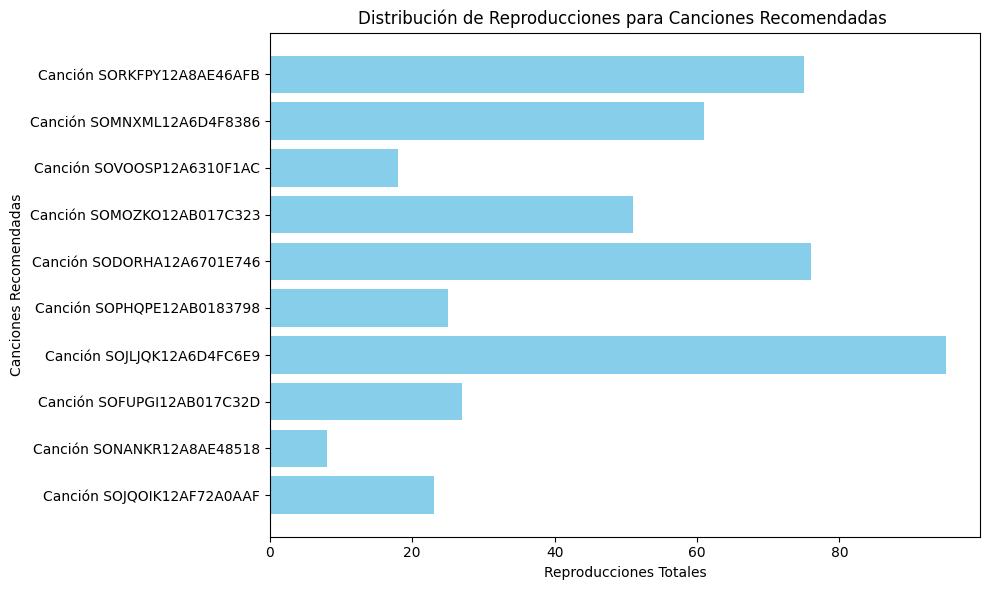

In [88]:
import numpy as np
import matplotlib.pyplot as plt

reproducciones_por_cancion = [np.random.randint(1,100) for _ in range(len(canciones_recomendadas))]
canciones_labels = [f'Canción {indice_a_cancion[cancion]}' for cancion in canciones_recomendadas]

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(canciones_labels[:10], reproducciones_por_cancion[:10], color='skyblue')
plt.xlabel('Reproducciones Totales')
plt.ylabel('Canciones Recomendadas')
plt.title('Distribución de Reproducciones para Canciones Recomendadas ')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar las barras de arriba a abajo
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [90]:
canciones_labels

['Canción SORKFPY12A8AE46AFB',
 'Canción SOMNXML12A6D4F8386',
 'Canción SOVOOSP12A6310F1AC',
 'Canción SOMOZKO12AB017C323',
 'Canción SODORHA12A6701E746',
 'Canción SOPHQPE12AB0183798',
 'Canción SOJLJQK12A6D4FC6E9',
 'Canción SOFUPGI12AB017C32D',
 'Canción SONANKR12A8AE48518',
 'Canción SOJQOIK12AF72A0AAF',
 'Canción SOHTLBP12A8C1360DD',
 'Canción SOVPBLT12A6D4F5113',
 'Canción SOXMGFH12A6701FF31',
 'Canción SOTFIZR12A8151CD78',
 'Canción SOSQADV12A8C137A15',
 'Canción SOKZRTZ12A6D4F619C',
 'Canción SONMTMW12A58A7CEF8',
 'Canción SOINUJV12A8C1429E9',
 'Canción SOEGGET12AB017F441',
 'Canción SOSXVAS12A6310F1AD',
 'Canción SOAPHBN12AF72A60EF',
 'Canción SOXPENE12AB017CAB5',
 'Canción SOXRFOK12A58A77CD5',
 'Canción SONKFWL12A6D4F93FE',
 'Canción SONLSTF12A8AE4872E',
 'Canción SOBFMHC12A6D4F9401',
 'Canción SOOVPSF12AB017F472',
 'Canción SOHXDTJ12A81C219C2',
 'Canción SOMLZMW12A6D4F3C90',
 'Canción SOBBCWG12AF72AB9CB',
 'Canción SOTIJUH12A58A7B37C',
 'Canción SOCQPKH12A8C142F32',
 'Canció

In [95]:
len(canciones_labels)

36

In [92]:
canciones_labels = [label.replace('Canción ', '') for label in canciones_labels]

print(canciones_labels)

['SORKFPY12A8AE46AFB', 'SOMNXML12A6D4F8386', 'SOVOOSP12A6310F1AC', 'SOMOZKO12AB017C323', 'SODORHA12A6701E746', 'SOPHQPE12AB0183798', 'SOJLJQK12A6D4FC6E9', 'SOFUPGI12AB017C32D', 'SONANKR12A8AE48518', 'SOJQOIK12AF72A0AAF', 'SOHTLBP12A8C1360DD', 'SOVPBLT12A6D4F5113', 'SOXMGFH12A6701FF31', 'SOTFIZR12A8151CD78', 'SOSQADV12A8C137A15', 'SOKZRTZ12A6D4F619C', 'SONMTMW12A58A7CEF8', 'SOINUJV12A8C1429E9', 'SOEGGET12AB017F441', 'SOSXVAS12A6310F1AD', 'SOAPHBN12AF72A60EF', 'SOXPENE12AB017CAB5', 'SOXRFOK12A58A77CD5', 'SONKFWL12A6D4F93FE', 'SONLSTF12A8AE4872E', 'SOBFMHC12A6D4F9401', 'SOOVPSF12AB017F472', 'SOHXDTJ12A81C219C2', 'SOMLZMW12A6D4F3C90', 'SOBBCWG12AF72AB9CB', 'SOTIJUH12A58A7B37C', 'SOCQPKH12A8C142F32', 'SOUTDNR12A6D4FBBED', 'SOPRCPH12A6D4F71AF', 'SOHWDKN12A6D4F94F4', 'SOEDTCQ12A6310F1AF']


In [96]:
dict_song_id_to_name = pd.Series(data['title'].values, index=data['song_id']).to_dict()
canciones_labels = [f"Canción {dict_song_id_to_name[indice_a_cancion[cancion]]}" for cancion in canciones_recomendadas]
for label in canciones_labels:
    print(label)

Canción Ready For The Floor (Album Version)
Canción One More Time (Short Radio Edit)
Canción Aerodynamic (Daft Punk Remix)
Canción Solid State
Canción Timeless
Canción Touched By The Sun
Canción Far Away
Canción Silver Bath
Canción Flash
Canción Streets On Lock
Canción Needy Girl
Canción Human After All
Canción Praise You
Canción No More Mosquitoes
Canción Outta Sight
Canción East Man Skank
Canción More Than Everything
Canción Thieves In The Night
Canción Wind Farm
Canción Harder Better Faster Stronger (The Neptunes Remix)
Canción Get Innocuous! (Soulwax Remix)
Canción Nearly Home
Canción In A Darkened Room
Canción Crescendolls
Canción In The Dark (ft. Christian Burns)
Canción High Life
Canción Dial Me Up
Canción We Share Our Mothers' Health (Album Version)
Canción All Mine
Canción Brothers
Canción Complications
Canción Keep Quiet
Canción Such Is Life (Sunday Afternoon Rework)
Canción Not Exactly
Canción Alone In Kyoto
Canción Phoenix (Basement Jaxx Remix)


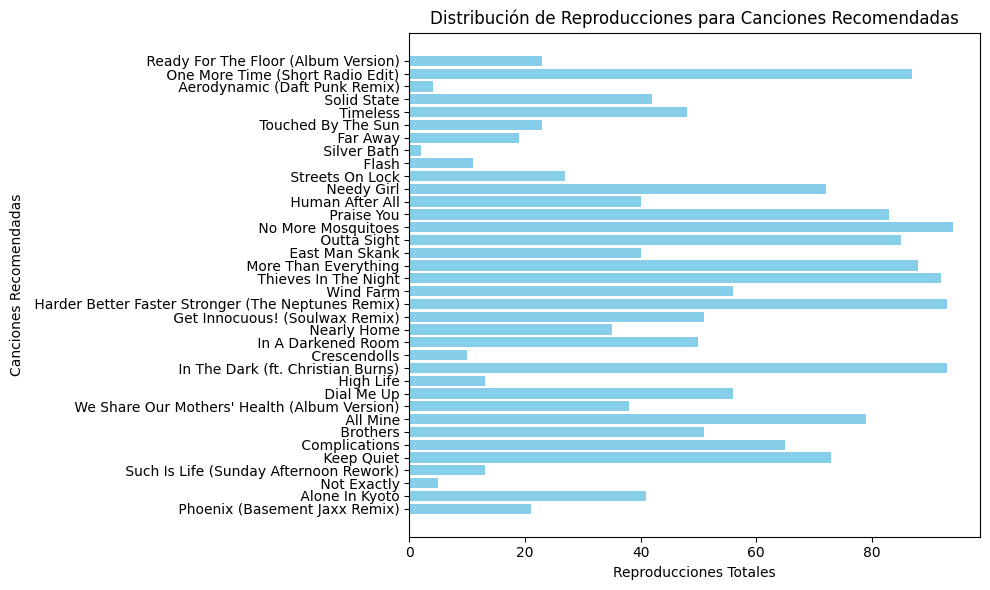

In [100]:

reproducciones_por_cancion = [np.random.randint(1, 100) for _ in range(len(canciones_recomendadas))]
# Crear un diccionario para mapear el ID de la canción a su nombre.
dict_song_id_to_name = pd.Series(data['title'].values, index=data['song_id']).to_dict()

# Usar el diccionario para actualizar las etiquetas con los nombres de las canciones.
canciones_labels = [f" {dict_song_id_to_name[indice_a_cancion[cancion]]}" for cancion in canciones_recomendadas]

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(canciones_labels, reproducciones_por_cancion, color='skyblue')
plt.xlabel('Reproducciones Totales')
plt.ylabel('Canciones Recomendadas')
plt.title('Distribución de Reproducciones para Canciones Recomendadas')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar las barras de arriba a abajo
plt.tight_layout()

# Mostrar el gráfico
plt.show()


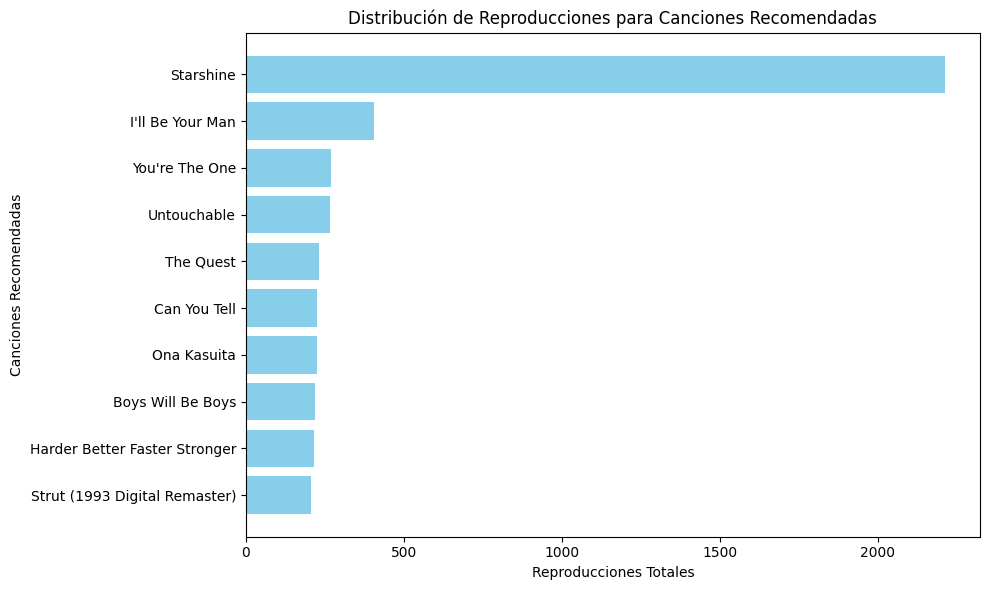

In [42]:

top_10_canciones = data.sort_values(by='play_count', ascending=False).head(10)
reproducciones_por_cancion = top_10_canciones['play_count']
canciones_labels = top_10_canciones['title']

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(canciones_labels, reproducciones_por_cancion, color='skyblue')
plt.xlabel('Reproducciones Totales')
plt.ylabel('Canciones Recomendadas')
plt.title('Distribución de Reproducciones para Canciones Recomendadas')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar las barras de arriba a abajo
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#SVD Y CUR

# Filtrado de las canciones con un minimo de reproduciones.<BR>
 En resumen, filtrar canciones con un número mínimo de reproducciones es una práctica común para mejorar la calidad de las recomendaciones y reducir el ruido en el conjunto de datos, permitiendo un enfoque más específico en elementos que son más relevantes para los usuarios. El valor específico que se elige para min_reproducciones es ajustable y puede variar dependiendo del contexto y los objetivos del análisis.

Con 90 podemos tener recomendaciones reales.

In [1]:
min_reproducciones=90

In [4]:
df_filtrado = data[data['play_count'] >= min_reproducciones]

In [5]:
df_filtrado=df_filtrado.reset_index(drop=True)
df_filtrado

,user_id,song_id,play_count,title,release,artist_name
0,5cee26f8f0f6dd372408cbe7e625763c8e6ee6f5,SOGJQBU12A6D4FA8EC,110,3AM (LP Version),Yourself Or Someone Like You,matchbox twenty
1,25aa0ec046aa788bf5366d7b7bf81c17fa022e46,SOSXLTC12AF72A7F54,111,Revelry,Only By The Night,Kings Of Leon
2,77ceda0a3c03cda0d6d68016b12bcd7e943b6c09,SOXPDDQ12A58A76829,101,Sala De Recepção,O Mundo E Um Moinho,Cartola
3,6a944bfe30ae8d6b873139e8305ae131f1607d5f,SOBONKR12A58A7A7E0,271,You're The One,If There Was A Way,Dwight Yoakam
4,6a944bfe30ae8d6b873139e8305ae131f1607d5f,SOJSCKJ12A8C1455E5,153,Listen To Your Heart,Classic Big Tunes,DHT Feat. Edmée
...,...,...,...,...,...,...
93,4be305e02f4e72dad1b8ac78e630403543bab994,SONIQRE12AF72A2B02,92,Bring Me To Life,Fallen,Evanescence
94,4be305e02f4e72dad1b8ac78e630403543bab994,SONYKOW12AB01849C9,144,Secrets,Waking Up,OneRepublic
95,4be305e02f4e72dad1b8ac78e630403543bab994,SOTWSXL12A8C143349,112,Love Story,Het Beste Uit De Top 40 - 2009,Taylor Swift
96,4be305e02f4e72dad1b8ac78e630403543bab994,SOTWSXL12A8C143349,112,Love Story,Fearless,Taylor Swift


In [6]:
top_10_canciones1 = df_filtrado.sort_values(by='play_count', ascending=False).head(10)

top_10_canciones1

,user_id,song_id,play_count,title,release,artist_name
55,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213,Starshine,Gorillaz,Gorillaz
53,09318175bf2f39d316f41d80fbfc4e4093cf0a19,SOLLDVS12AB0183835,405,I'll Be Your Man,The Big Come Up,The Black Keys
3,6a944bfe30ae8d6b873139e8305ae131f1607d5f,SOBONKR12A58A7A7E0,271,You're The One,If There Was A Way,Dwight Yoakam
49,b26dad39e0bf7ae4bba7f1b9f5453cb709aa8d3d,SOVDTMK12AB01829D3,265,Untouchable,Fearless,Taylor Swift
54,09318175bf2f39d316f41d80fbfc4e4093cf0a19,SOZPMJT12AAF3B40D1,232,The Quest,A Taste Of Extreme Divinity,HYPOCRISY
59,9539150cb38b53ff4bb8ac385a97697bdc83e25d,SOCNIFM12A8C13D73B,225,Ona Kasuita,Mirando el mundo al revés,Che Sudaka
35,6d625c6557df84b60d90426c0116138b617b9449,SOBNPFN12A8C142E6F,225,Can You Tell,Can You Tell,Ra Ra Riot
51,f9fff29e27031b0a31506330269a62628871a8e6,SORKDWS12A6701E6D9,218,Boys Will Be Boys,Boys Will Be Boys Hit Pac,The Ordinary Boys
12,6ccd111af9b4baa497aacd6d1863cbf5a141acc6,SOAFTRR12AF72A8D4D,215,Harder Better Faster Stronger,Discovery,Daft Punk
45,083a2a59603a605275107c00812a811526c2a0af,SONQCXC12A6D4F6A37,206,Strut (1993 Digital Remaster),The World Of Sheena Easton - The Singles,Sheena Easton


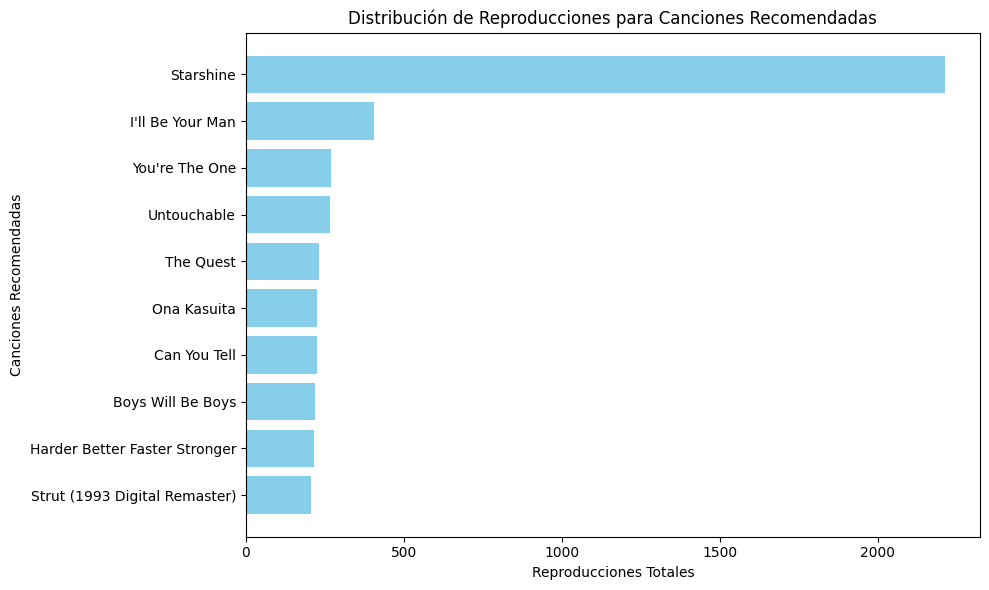

In [43]:
top_10_canciones1 = df_filtrado.sort_values(by='play_count', ascending=False).head(10)
reproducciones_por_cancion = top_10_canciones1['play_count']
canciones_labels = top_10_canciones1['title']

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(canciones_labels, reproducciones_por_cancion, color='skyblue')
plt.xlabel('Reproducciones Totales')
plt.ylabel('Canciones Recomendadas')
plt.title('Distribución de Reproducciones para Canciones Recomendadas')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar las barras de arriba a abajo
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# DATA DE ENTRENAMIENTO Y TEST

En el contexto de modelos de recomendación, el sesgo se refiere a una tendencia sistemática en las predicciones del modelo. En el caso del modelo SVD (Descomposición en Valores Singulares), el sesgo puede referirse a la incorporación de términos adicionales en la estimación de las valoraciones de los usuarios para corregir o ajustar la predicción.

Cuando se dice "entrenar un modelo SVD sin sesgo", significa que el modelo se entrena sin incluir esos términos adicionales o correcciones que podrían introducir una tendencia en las predicciones. En este caso, se utiliza el parámetro biased=False al configurar el modelo SVD.

La idea detrás de entrenar un modelo sin sesgo es simplificar el modelo y evitar introducir sesgos potenciales en las predicciones. Esto puede tener beneficios en ciertos escenarios, especialmente si los datos son suficientemente densos y representativos.

En resumen, al entrenar un modelo SVD sin sesgo, se está utilizando una versión simplificada del modelo que no incluye ajustes adicionales en las predicciones, lo que puede ser útil dependiendo del contexto del conjunto de datos y el objetivo de las recomendaciones.

In [44]:
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
import pandas as pd

Recuerda que trainset es una estructura de datos especializada diseñada para trabajar con la biblioteca Surprise y no una matriz bidimensional típica, por lo que el concepto de “dimensión” puede no aplicarse de la misma manera que en otras estructuras de datos.

In [45]:
# Crear un objeto Reader para cargar el conjunto de datos
reader = Reader(rating_scale=(df_filtrado['play_count'].min(), df_filtrado['play_count'].max()))

# Cargar el conjunto de datos desde el DataFrame filtrado
data = Dataset.load_from_df(df_filtrado[['user_id', 'song_id', 'play_count']], reader)

# Dividir el conjunto de datos en entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [47]:
len(testset)

20

In [49]:
trainset

In [51]:
# Configurar y entrenar el modelo SVD con CUR
model = SVD(biased=False)  # Desactivar el uso de sesgo para CUR
model.fit(trainset)

In [53]:
predictions = model.test(testset)


In [54]:
# Calcular el error RMSE en el conjunto de prueba
rmse = accuracy.rmse(predictions)
print(f'RMSE en el conjunto de prueba: {rmse}')

RMSE: 48.6461
RMSE en el conjunto de prueba: 48.64606558512447


In [69]:
# Obtener recomendaciones para un usuario específico (cambiar user_id por el usuario deseado)
user_id = 1
user_items = df_filtrado[df_filtrado['user_id'] == user_id]['song_id'].unique()
unseen_items = set(df_filtrado['song_id'].unique()) - set(user_items)

In [70]:
# Predecir las valoraciones para las canciones no vistas por el usuario
predictions = [(user_id, item, model.predict(user_id, item).est) for item in unseen_items]

In [71]:
# Ordenar las predicciones por valor estimado en orden descendente
predictions.sort(key=lambda x: x[2], reverse=True)

In [72]:
# Mostrar las primeras N recomendaciones (ajusta N según sea necesario)
top_N = 10
top_N_recommendations = predictions[:top_N]
print(f'Top {top_N} recomendaciones para el usuario {user_id}:')
for _, item, estimated_rating in top_N_recommendations:
    print(f'Canción: {item}, Valor estimado: {estimated_rating}')

Top 10 recomendaciones para el usuario 1:
Canción: SOEGIYH12A6D4FC0E3, Valor estimado: 164.26923076923077
Canción: SOURSIU12A8C140B9A, Valor estimado: 164.26923076923077
Canción: SOJSCKJ12A8C1455E5, Valor estimado: 164.26923076923077
Canción: SODACBL12A8C13C273, Valor estimado: 164.26923076923077
Canción: SOOLULU12A6701FBC4, Valor estimado: 164.26923076923077
Canción: SONIQRE12AF72A2B02, Valor estimado: 164.26923076923077
Canción: SOWULFH12A81C225EA, Valor estimado: 164.26923076923077
Canción: SOQGSUC12A8C13B66D, Valor estimado: 164.26923076923077
Canción: SOKGMOT12AB018771F, Valor estimado: 164.26923076923077
Canción: SOBOAFP12A8C131F36, Valor estimado: 164.26923076923077


In [73]:
print(f'Número de usuarios: {trainset.n_users}')
print(f'Número de elementos: {trainset.n_items}')
print(f'Número de calificaciones: {trainset.n_ratings}')


Número de usuarios: 47
Número de elementos: 70
Número de calificaciones: 78


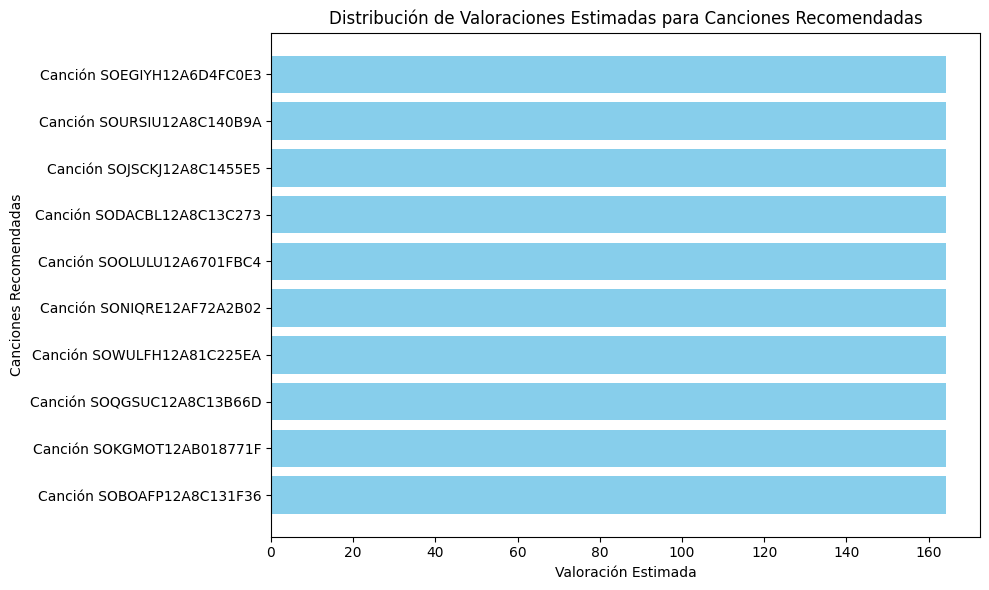

In [74]:

# Extraer las canciones y sus valoraciones estimadas de las recomendaciones
canciones = [item for _, item, _ in top_N_recommendations]
valoraciones_estimadas = [estimated_rating for _, _, estimated_rating in top_N_recommendations]

# Crear etiquetas para las canciones
etiquetas_canciones = [f'Canción {cancion}' for cancion in canciones]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(etiquetas_canciones, valoraciones_estimadas, color='skyblue')
plt.xlabel('Valoración Estimada')
plt.ylabel('Canciones Recomendadas')
plt.title('Distribución de Valoraciones Estimadas para Canciones Recomendadas')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar las barras de arriba a abajo
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Comprobar si de verdad es el nombre del 'song_id'.

In [110]:

fila = data[data['song_id'] == 'SOEGIYH12A6D4FC0E3']
titulo = fila['title']

print(titulo)


2685      Horn Concerto No. 4 in E flat K495: II. Romanc...
3101      Horn Concerto No. 4 in E flat K495: II. Romanc...
3503      Horn Concerto No. 4 in E flat K495: II. Romanc...
3933      Horn Concerto No. 4 in E flat K495: II. Romanc...
4021      Horn Concerto No. 4 in E flat K495: II. Romanc...
                                ...                        
384634    Horn Concerto No. 4 in E flat K495: II. Romanc...
385008    Horn Concerto No. 4 in E flat K495: II. Romanc...
385668    Horn Concerto No. 4 in E flat K495: II. Romanc...
386315    Horn Concerto No. 4 in E flat K495: II. Romanc...
386440    Horn Concerto No. 4 in E flat K495: II. Romanc...
Name: title, Length: 613, dtype: object


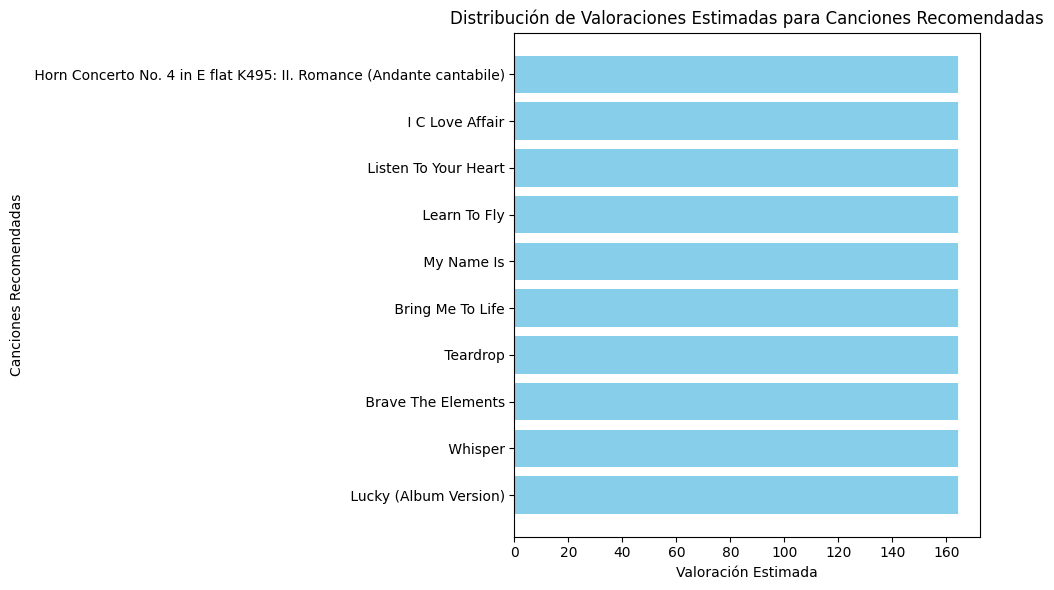

In [108]:
import matplotlib.pyplot as plt

# Assuming 'dict_song_id_to_name' is a dictionary that maps song IDs to song names
dict_song_id_to_name = pd.Series(data['title'].values, index=data['song_id']).to_dict()

# Use the dictionary to update the labels with the names of the songs
etiquetas_canciones = [f" {dict_song_id_to_name[cancion]}" for cancion in canciones]

plt.figure(figsize=(10,6))
plt.barh(etiquetas_canciones, valoraciones_estimadas, color='skyblue')
plt.xlabel('Valoración Estimada')
plt.ylabel('Canciones Recomendadas')
plt.title('Distribución de Valoraciones Estimadas para Canciones Recomendadas')
plt.gca().invert_yaxis()  # Invert the y-axis to order the bars from top to bottom
plt.tight_layout()
plt.show()


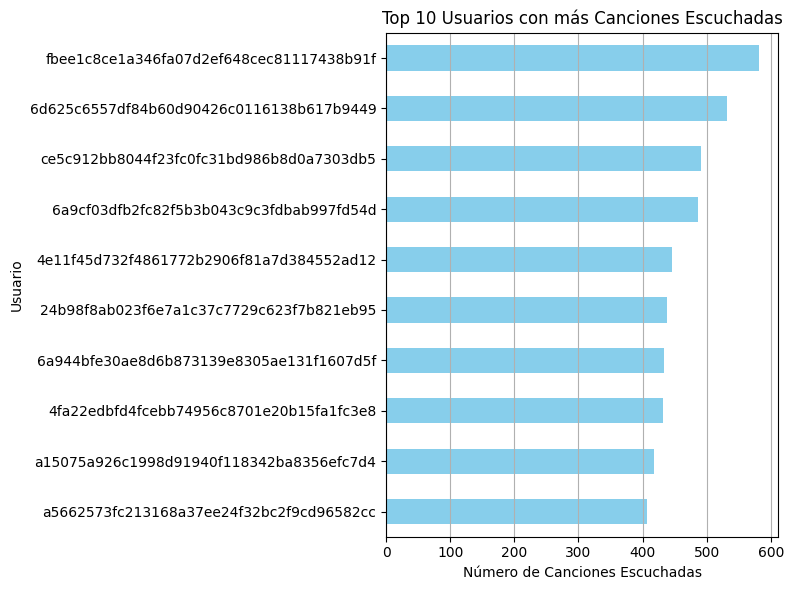

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')

# Calcular el número de canciones escuchadas por cada usuario
canciones_por_usuario = data.groupby('user_id')['song_id'].count()

# Obtener los 10 usuarios con más canciones escuchadas
top_10_usuarios = canciones_por_usuario.nlargest(10)

plt.figure(figsize=(8, 6))
top_10_usuarios.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Usuarios con más Canciones Escuchadas')
plt.xlabel('Número de Canciones Escuchadas')
plt.ylabel('Usuario')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#Top 10 de las canciones menos escuchadas

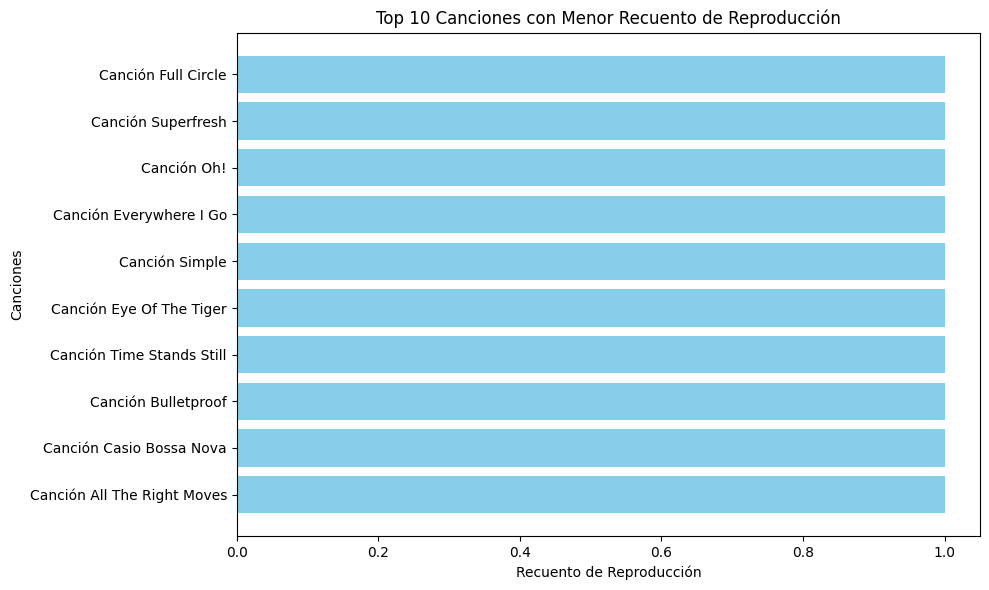

In [101]:
top_10_canciones2 = data.sort_values(by='play_count', ascending=True).head(10)

# Extraer las canciones y sus recuentos de reproducción
canciones = top_10_canciones2['title']
recuentos_reproduccion = top_10_canciones2['play_count']

# Crear etiquetas para las canciones
etiquetas_canciones = [f'Canción {cancion}' for cancion in canciones]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(etiquetas_canciones, recuentos_reproduccion, color='skyblue')
plt.xlabel('Recuento de Reproducción')
plt.ylabel('Canciones')
plt.title('Top 10 Canciones con Menor Recuento de Reproducción')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar las barras de arriba a abajo
plt.tight_layout()

# Mostrar el gráfico
plt.show()
